# Pyber Analysis:

1. There is a correlation between number of rides and the average fare per city. Urban cities the most number of rides, the highest number of drivers and had the lowest average fare of the three types of cities.
2. The amount of drivers increases as the city classification gets more urban, with Urban cities having the highest number and Rural cities having the lowest.
3. There is a much smaller percentage of drivers in rural areas however their fare and number of drivers is a higher percentage in comparison.

In [248]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#matplotlib %inline

rides = pd.read_csv('/Users/jennifercook/Downloads/UDEN201805DATA1-master 3/Week5/HW/Instructions/Pyber/raw_data/ride_data.csv')
city = pd.read_csv('/Users/jennifercook/Downloads/UDEN201805DATA1-master 3/Week5/HW/Instructions/Pyber/raw_data/city_data.csv')

#city = city.drop_duplicates('city', keep = 'first')
#rides = rides.drop_duplicates('city', keep = 'first')
df = rides.merge(city, how = 'left', on = 'city')



In [233]:
cities = df.groupby('city')
avg_fare = cities.mean()['fare']
total_rides_city = cities['ride_id'].count()
total_drivers_city = cities.sum()['driver_count']
city_type = city.set_index('city')['type']
#avg_drivers_city = [int(x) for x in avg_drivers_city]
city_df = pd.DataFrame({
    'Average Fare': avg_fare,
    'Total Rides': total_rides_city,
    'Total Drivers': total_drivers_city,
    'City Type': city_type
})
urban = city_df[city_df['City Type'] == 'Urban']
suburban = city_df[city_df['City Type'] == 'Suburban']
rural = city_df[city_df['City Type'] == 'Rural']



# Bubble Plot of Ride Sharing

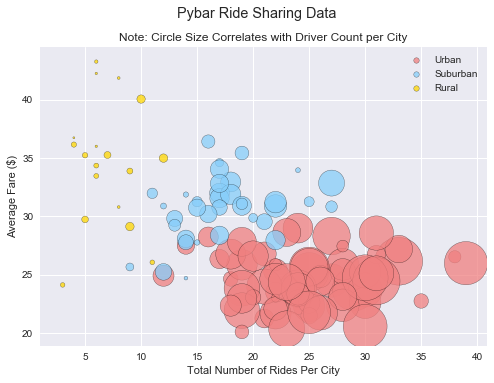

In [252]:
city_df.sort_values('Total Drivers', ascending = False)

colors = {'light coral': '#F08080', 'light sky blue' : '#87CEFA', 'gold' : '#FFD700'}
plt.scatter(urban['Total Rides'], urban['Average Fare'], s = urban['Total Drivers'], color = colors['light coral'],edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s = suburban['Total Drivers'], color = colors['light sky blue'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Total Rides'], rural['Average Fare'], s = rural['Total Drivers'], color = colors['gold'], edgecolor = 'black', label = 'Rural', alpha = .75)

plt.title('Note: Circle Size Correlates with Driver Count per City')
plt.suptitle('Pybar Ride Sharing Data')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare ($)')

lgnd = plt.legend(loc="best", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


# Percent of Fares By City Type

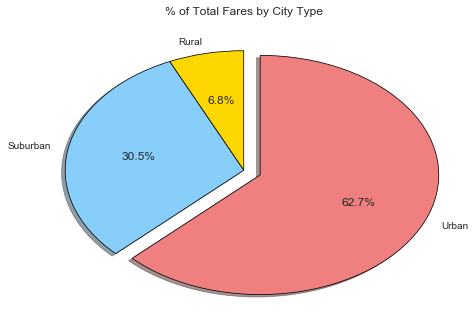

In [247]:
city_type = df.groupby('type')

fare_sum = city_type.sum()['fare']

labels = fare_sum.index
color_chart = [colors['gold'], colors['light sky blue'], colors['light coral']]
explode = [0, 0, 0.1]

plt.pie(fare_sum, startangle = 90, explode= explode, labels= labels, autopct = "%1.1f%%", colors = color_chart, shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'})
plt.title('% of Total Fares by City Type')

plt.show()

# Percent of Total Rides By City Type

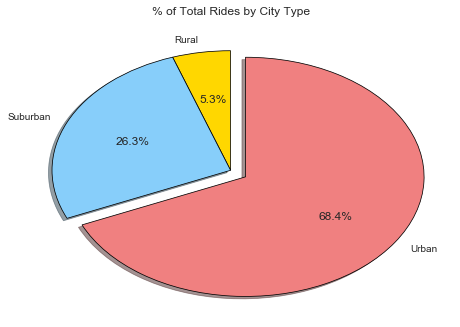

In [246]:
rides_count = city_type.count()['ride_id']

labels = rides_count.index
color_chart = [colors['gold'], colors['light sky blue'], colors['light coral']]
explode = [0, 0, 0.1]

plt.pie(rides_count, startangle = 90, explode= explode, labels= labels, autopct = "%1.1f%%", colors = color_chart, shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')

plt.show()

# Percent of Total Drivers By City Type

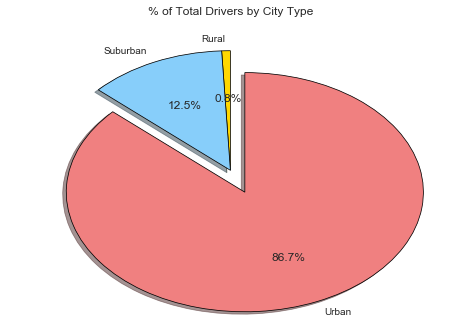

In [249]:
driver_count = city_type.sum()['driver_count']

labels = driver_count.index
color_chart = [colors['gold'], colors['light sky blue'], colors['light coral']]
explode = [0, 0, 0.2]

plt.pie(driver_count, startangle = 90, explode= explode, labels= labels, autopct = "%1.1f%%", colors = color_chart, shadow = True, wedgeprops = {'linewidth': .75, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')

plt.show()